Project description
===

Here we have a small dataset of various data on video games collected from open sources. We want to identify patterns that determine whether a game succeeds or not. They would allow us to spot potential big winners and plan advertising campaigns.

First, we should do some data preprocessing: fill in the missing values, clean spelling errors, and change data types. Also, we need to add some new columns to help our analysis. After doing so, we could explore our data and test hypotheses. 
<br /><br />

**Description of the data**
```
  Name
  Platform
  Year_of_Release
  Genre
  NA_sales (North American sales in USD million)
  EU_sales (sales in Europe in USD million)
  JP_sales (sales in Japan in USD million)
  Other_sales (sales in other countries in USD million)
  Critic_Score (maximum of 100)
  User_Score (maximum of 10)
  Rating (ESRB)
```

## Open the data file and study the general information

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt 
import seaborn as sns
import sidetable
from IPython.display import HTML, display_html

%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'

In [3]:
try:
    games = pd.read_csv('./datasets/games.csv')
except:
    games = pd.read_csv('../datasets/games.csv') 

In [4]:
games.info()
display(games.stb.missing(clip_0 = True, style = True))
display(games.describe())
display(games.describe(include = ['object']))
display(games.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,missing,total,percent
Critic_Score,"8,578","16,715",51.32%
Rating,"6,766","16,715",40.48%
User_Score,"6,701","16,715",40.09%
Year_of_Release,269,"16,715",1.61%
Name,2,"16,715",0.01%
Genre,2,"16,715",0.01%


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14058,Beatdown: Fists of Vengeance,XB,2005.0,Action,0.03,0.01,0.00,0.00,NaN,NaN,NaN
84,Final Fantasy X,PS2,2001.0,Role-Playing,2.91,2.07,2.73,0.33,92.0,8.7,T
10845,Rocky,GC,2002.0,Fighting,0.07,0.02,0.00,0.00,74.0,tbd,T
11252,Lost Heroes,3DS,2012.0,Role-Playing,0.00,0.00,0.09,0.00,NaN,NaN,NaN
15531,B-17: Fortress in the Sky,DS,2007.0,Simulation,0.02,0.00,0.00,0.00,38.0,tbd,E10+


In [5]:
print('\'tbd\' in User_Score: {0:.2%}'.format(games[games['User_Score'] == 'tbd']['Name'].count()/len(games)))

'tbd' in User_Score: 14.50%


In [6]:
print('Duplicates in data: {0}'.format(games.duplicated().sum()))

Duplicates in data: 0


### Conclusion 

There are missing values in `Year_of_Release` (1.6%), `Critic_Score` (51%),  `User_Score` (40%), and `Rating` (40%) that we could try to fill in. Also, there are two entries without Names and Genres that I suggest deleting.   
Also, we should pay attention to 'tbd' values in User_Score (14.50%) and treat them as missing values. 

We should change data types for Year_of_Release, Platform, Genre, and Rating and downcast all sales and scores columns.

We don't have any duplicates in this data set, so nothing to drop here.

## Data preprocessing

In [7]:
# renaming columns to lowercase
games.columns = games.columns.str.lower()

# dropping the entries with missing names
games = games.dropna(subset=['name']).reset_index(drop = True)

# stripping leading and trailing whitespaces from names
games['name'] = games['name'].str.strip()

# changing 'tbd' user_score to NaN
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan

# changing and downcasting types
games['year_of_release'] = games['year_of_release'].astype('Int16')

games['na_sales'] = pd.to_numeric(games['na_sales'], downcast = 'float')
games['eu_sales'] = pd.to_numeric(games['eu_sales'], downcast = 'float')
games['jp_sales'] = pd.to_numeric(games['jp_sales'], downcast = 'float')
games['other_sales'] = pd.to_numeric(games['other_sales'], downcast = 'float')
games['critic_score'] = pd.to_numeric(games['critic_score'], downcast = 'float')
games['user_score'] = pd.to_numeric(games['user_score'], downcast = 'float')

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int16  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float32
 5   eu_sales         16713 non-null  float32
 6   jp_sales         16713 non-null  float32
 7   other_sales      16713 non-null  float32
 8   critic_score     8137 non-null   float32
 9   user_score       7590 non-null   float32
 10  rating           9949 non-null   object 
dtypes: Int16(1), float32(6), object(4)
memory usage: 963.1+ KB


In [8]:
# filling in the year_of_release, critic_score, user_score and rating based on the entries with the same name. 
# (It's the same game on different platforms).
games['year_of_release'] = games['year_of_release'].fillna(games.groupby('name')['year_of_release']. \
                                                           transform(lambda x: next(iter(x.mode()), np.nan)))
games['rating'] = games['rating'].fillna(games.groupby('name')['rating']. \
                                         transform(lambda x: next(iter(x.mode()), np.nan)))
games['user_score'] = games['user_score'].fillna(games.groupby('name')['user_score']. \
                                                 transform(lambda x: next(iter(x.mode()), np.nan)))
games['critic_score'] = games['critic_score'].fillna(games.groupby('name')['critic_score']. \
                                                     transform(lambda x: next(iter(x.mode()), np.nan)))

display(games.stb.missing(clip_0 = True, style = True))

,missing,total,percent
user_score,"8,024","16,713",48.01%
critic_score,"7,615","16,713",45.56%
rating,"6,327","16,713",37.86%
year_of_release,146,"16,713",0.87%


In [9]:
# since platforms have a limited lifetime, we could fill in missing year_of_release 
# based on the mode for the platform.
games['year_of_release'] = games['year_of_release'].fillna(games.groupby('platform')['year_of_release']. \
                                                           transform(lambda x: next(iter(x.mode()), np.nan)))

display(games.stb.missing(clip_0 = True, style = True))

,missing,total,percent
user_score,"8,024","16,713",48.01%
critic_score,"7,615","16,713",45.56%
rating,"6,327","16,713",37.86%


We still have a lot of missing values in both scores and ratings. Let's find if Users' and Critics' scores are correlated.

In [10]:
print('Correlation of User score to Critic score is: {0:.2f}'.format(games['user_score'].corr(games['critic_score'])))

Correlation of User score to Critic score is: 0.55


There is a weak correlation here, but it's better than nothing. Therefore, we could use Critic's score to fill in the missing User's score and vice versa.

In [11]:
games.loc[games['user_score'].isnull(), 'user_score'] = games['critic_score'] / 10
games.loc[games['critic_score'].isnull(), 'critic_score'] = games['user_score'] * 10
display(games.stb.missing(clip_0 = True, style = True))

,missing,total,percent
critic_score,"7,279","16,713",43.55%
user_score,"7,279","16,713",43.55%
rating,"6,327","16,713",37.86%


Let's look if there is any dependency between Platform, Genre, and Rating that we could use.

In [12]:
data_crosstab = pd.crosstab([games['platform'], games['genre']], games['rating'])
data_crosstab.tail(10)

rating                 AO   E  E10+  EC  K-A   M  RP  T
platform genre                                         
XOne     Adventure      0   0     0   0    0   4   0  4
         Fighting       0   0     0   0    0   2   0  4
         Misc           0   4     7   0    0   1   0  4
         Platform       0   0     4   0    0   0   0  1
         Racing         0  12     4   0    0   0   0  1
         Role-Playing   0   0     0   0    0  12   0  1
         Shooter        0   0     2   0    0  25   0  6
         Simulation     0   1     0   0    0   0   0  1
         Sports         0  24     5   0    0   0   0  7
         Strategy       0   1     0   0    0   0   0  1

There is some dependency between Platform-Genre and Rating that we could use to fill in missing Ratings' values for games released since 1994 (the year when ESRB was introduced).

In [13]:
games.loc[games['year_of_release'] >= 1994, 'rating'] = games[games['year_of_release'] >= 1994]['rating']. \
                                                        fillna(games.groupby(['platform','genre'])['rating']. \
                                                        transform(lambda x: next(iter(x.mode()), np.nan)))

display(games.stb.missing(clip_0 = True, style = True))

,missing,total,percent
critic_score,"7,279","16,713",43.55%
user_score,"7,279","16,713",43.55%
rating,574,"16,713",3.43%


We need to add a column with total sales across all the regions.

In [14]:
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)

### Conclusion

First, I did some cleaning:
- renamed the column names to lowercase;
- dropped two entries with missing Names;
- stripped leading and trailing whitespaces from Names;
- changed TBD User_score to NaN;
- converted and downcasted data types.

Secondly, I filled in Year_of_release, Critic_score, User_score, and Rating based on the same game on other platforms (using the mode value). This tactic added me about 0.7% in Year_of_release, 5.8% in Critic_score, 6.6% in User_score, and 2.6% in Ratings.

Since platforms have a limited lifetime, I filled in the remaining missing Year_of_release based on the mode for the Platform.

Then I found that Users' and Critics' scores have a weak correlation, and for entries with only one score, I used Critics' scores to fill in the missing Users' scores and vice versa. It gave me 2% for Critics_score and 4.5% for User_score.

After that, I found some dependency between Platform, Genre, and Rating. So I filled in 34.4% of missing Ratings based on the same Platform and Genre. 

I still have 43.55% of Users' and Critics' scores missing that I don't have any meaningful way to fill in. It is a too large part of the dataset to fill in with the averages for any broad categories. So I'm leaving them missing and will try to find a better data source next time.

Lastly, I calculate the total sales across all regions for each game.

## Analyze the data

**How many games were released in different years. Is the data for every period significant?**

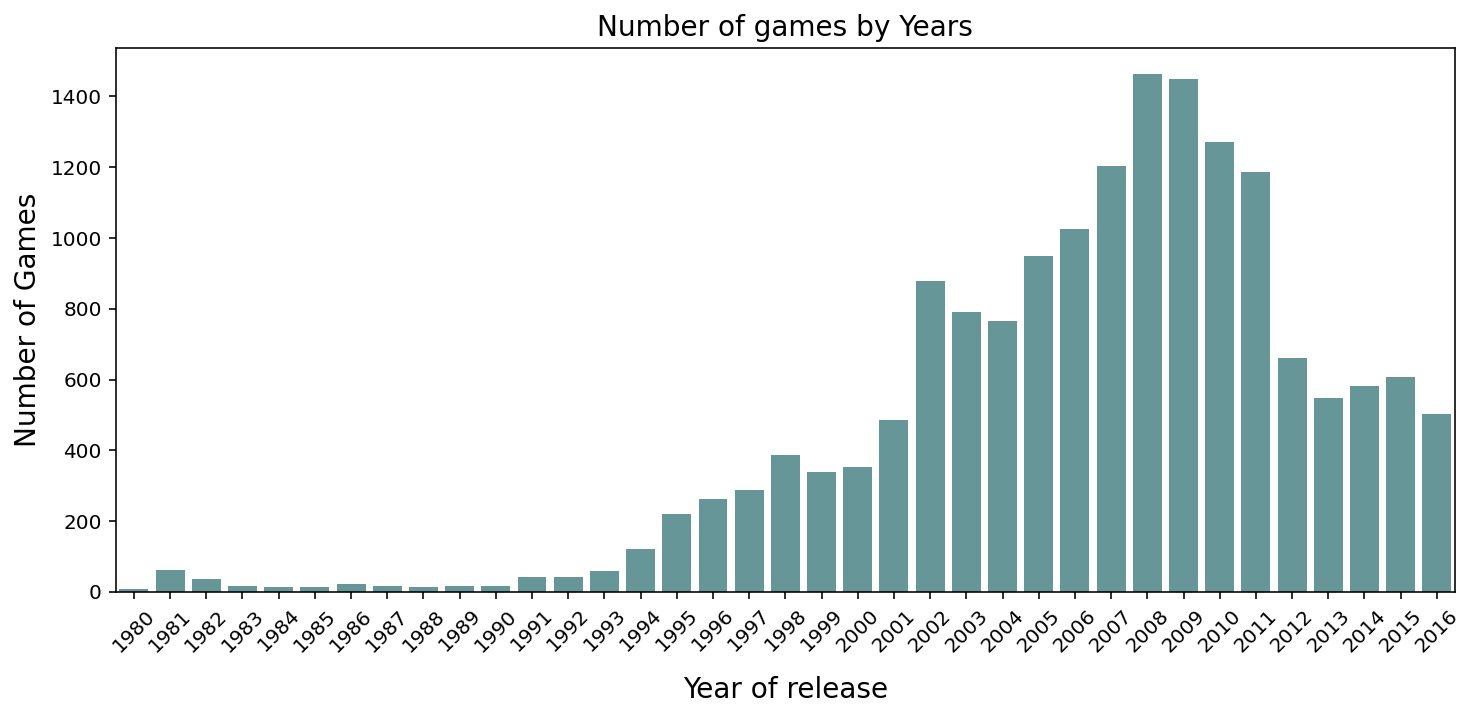

In [15]:
by_year = games[['year_of_release','name']].groupby(['year_of_release']).count(). \
        sort_values(by ='year_of_release').reset_index()

fig, ax = plt.subplots(figsize = (12, 5))
sns.barplot(data = by_year, x = 'year_of_release', y = 'name', color = 'cadetblue', ax = ax)
plt.xticks(rotation = 45);
ax.set_title('Number of games by Years', fontsize = 14)
ax.set_xlabel('Year of release', labelpad = 10, fontsize = 14)
ax.set_ylabel('Number of Games', fontsize = 14);

Until 2002 there were significantly fewer games each year. Therefore we could discard ancient data.

-----
**How sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?**

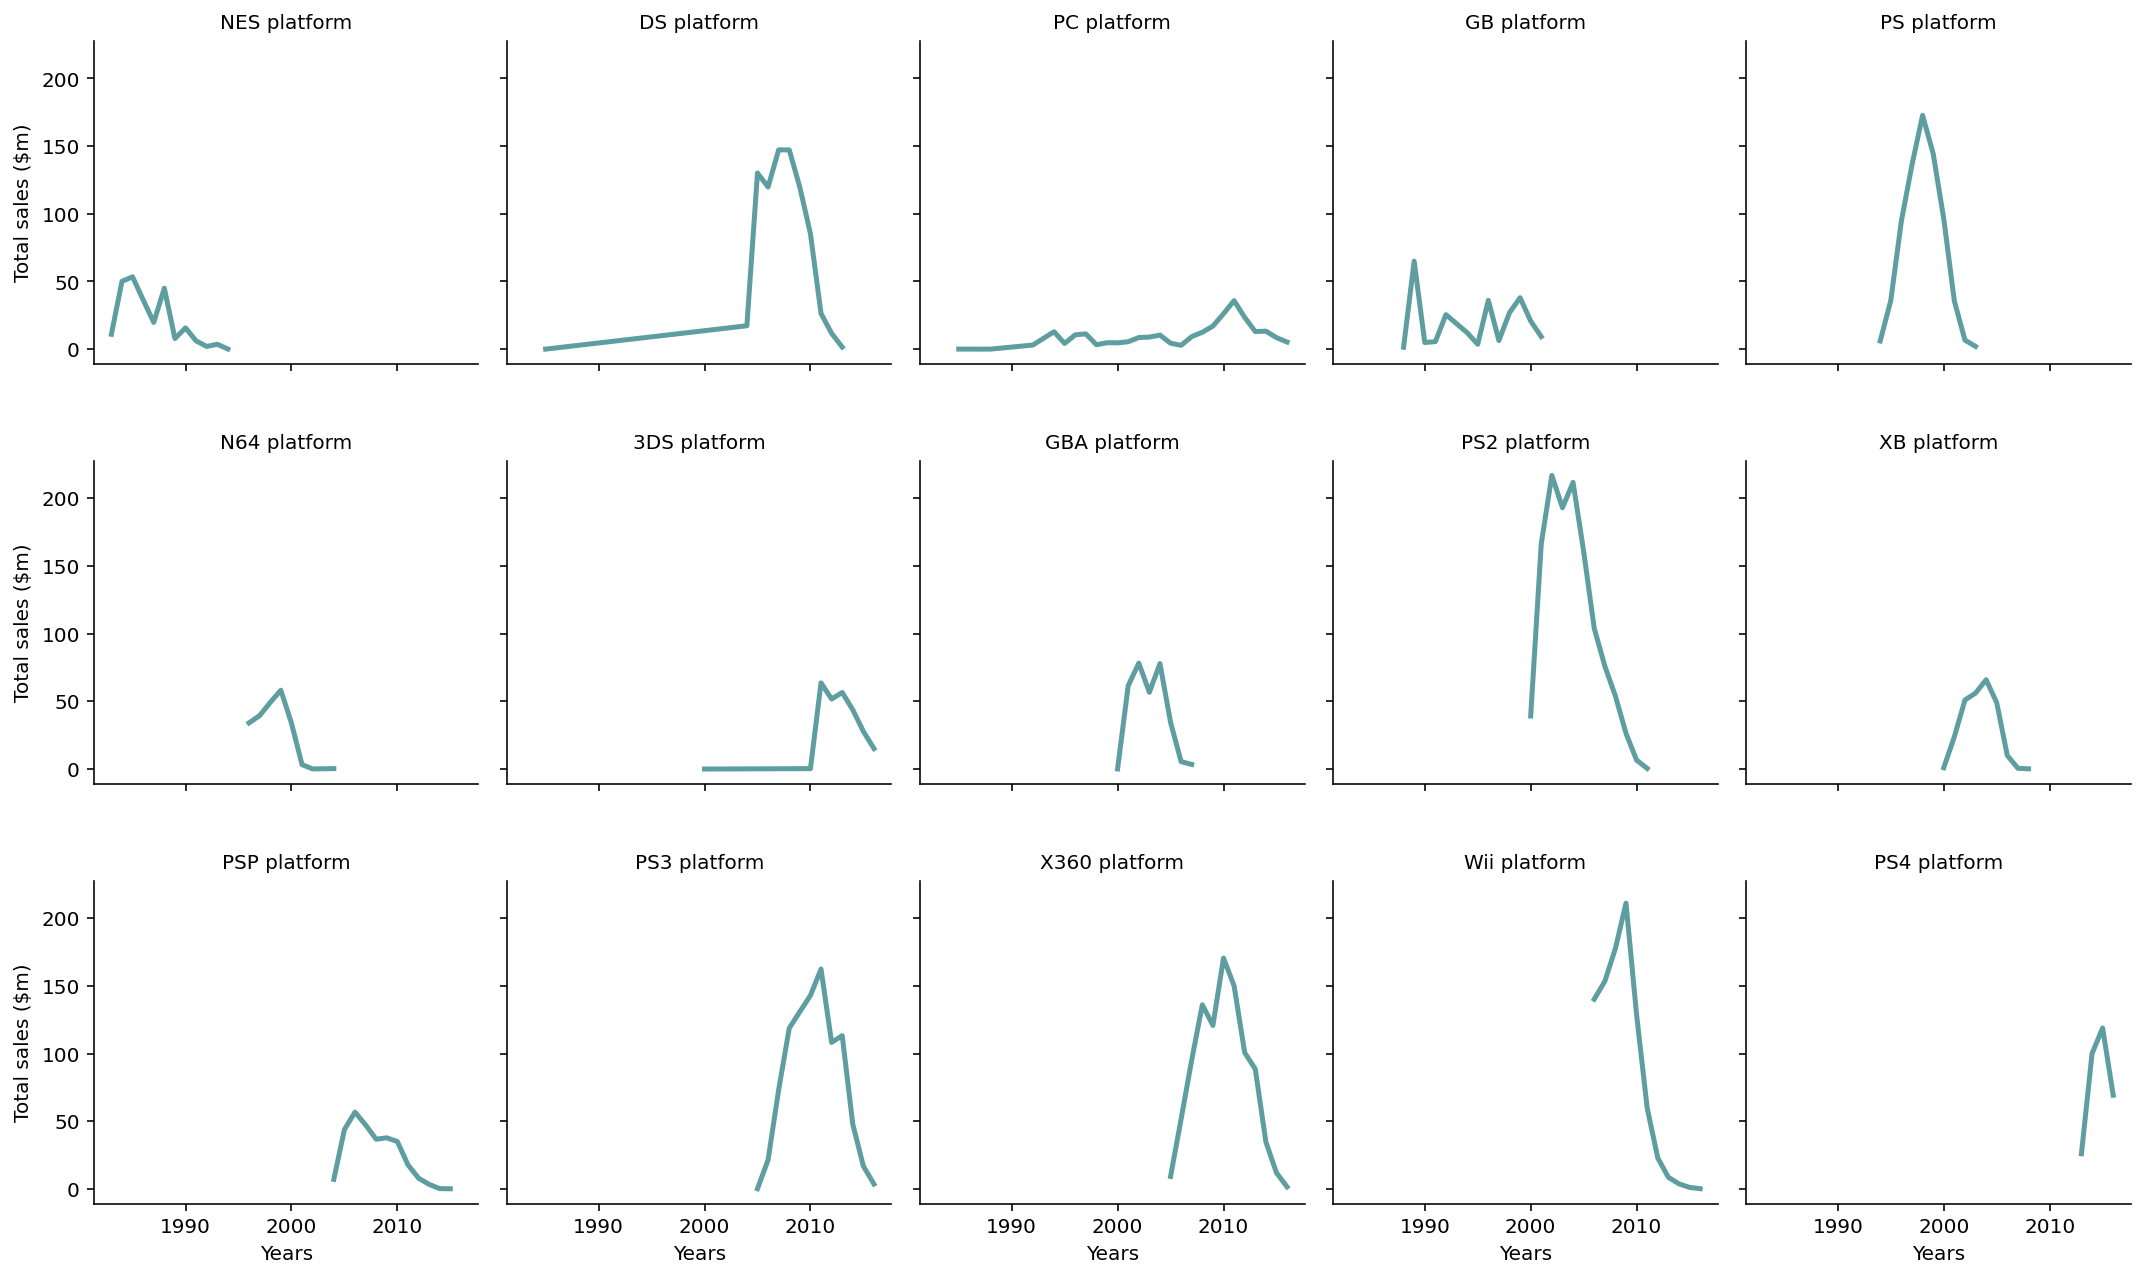

In [16]:
# let's find platforms with total_sales larger than the median
by_sales = games[['platform','total_sales']].groupby(['platform']).sum(). \
                sort_values(by = 'total_sales').reset_index()
top_platforms = by_sales[by_sales['total_sales'] > by_sales['total_sales'].median()]

# and for these platforms calculate and graph total_sales by year
platforms_by_sales = pd.pivot_table(games.query('platform in @top_platforms.platform'), \
                                    index = ['year_of_release','platform'], 
                                    values = 'total_sales', aggfunc = 'sum').reset_index()

g = sns.relplot(kind = 'line', data = platforms_by_sales, x = 'year_of_release', y = 'total_sales', \
                col = 'platform', col_wrap = 5, height = 3, linewidth = 2.5, color = 'cadetblue')
g.set_axis_labels('Years', 'Total sales ($m)')
g.set_titles(col_template = '{col_name} platform')
plt.subplots_adjust(hspace = 0.3);

Looking at 15 platforms with the most significant sales, we could see that platforms have an average lifespan of 10-15 years, except for PC and Nintendo DS. So to build our prognosis, we should leave only the data for the eighth generation of platforms.

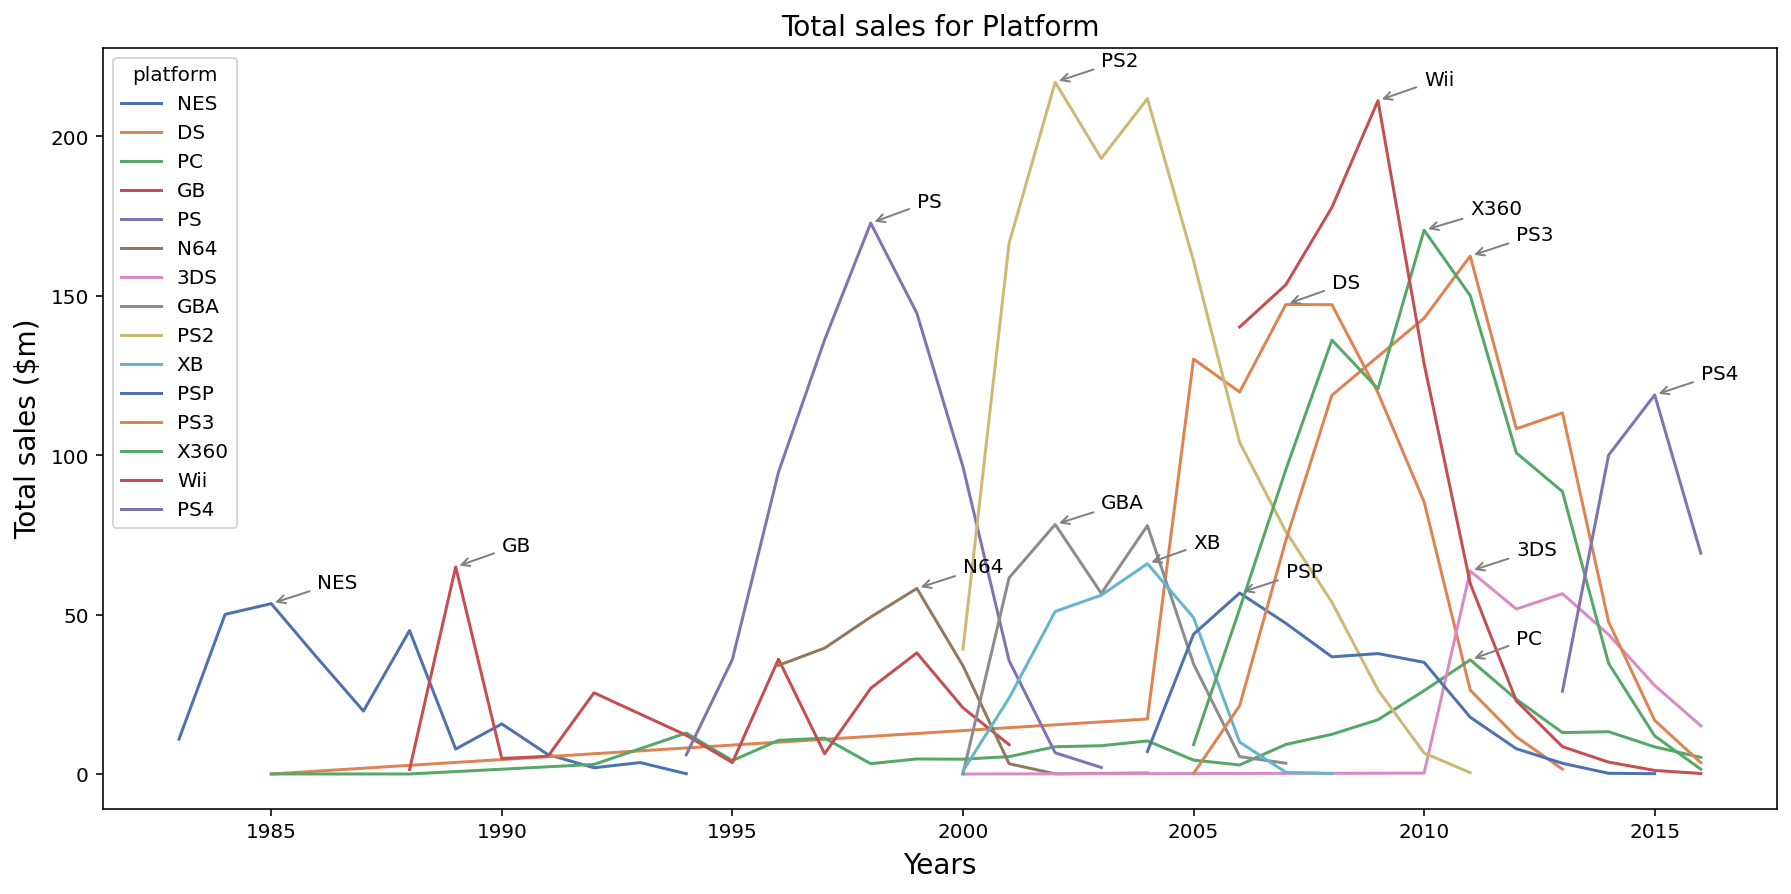

In [17]:
fig, ax = plt.subplots(figsize = (15, 7))
sns.lineplot(data = platforms_by_sales, x = 'year_of_release', y = 'total_sales', \
                 linewidth = 1.5, hue = 'platform', ax = ax, \
                 style="platform", dashes=False, palette='deep')

ax.set_title('Total sales for Platform', fontsize = 14)
ax.set_xlabel('Years', labelpad = 5, fontsize = 14)
ax.set_ylabel('Total sales ($m)', fontsize = 14);

for platform, pl_group in platforms_by_sales.groupby('platform'):
    peak = pl_group[pl_group['total_sales'] == pl_group['total_sales'].max()]
    ax.annotate(platform, xy = (peak['year_of_release'], peak['total_sales']), 
                xytext = (peak['year_of_release'] + 1, peak['total_sales'] + 5), 
                arrowprops = {'arrowstyle': '->', 'color': 'gray'})

---
**Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.
Work only with the data that you've decided is relevant. Disregard the data for previous years.**

In [18]:
# let's find what platforms are doing best in 2016 in order to find what part of data is too old to keep using
bestplatforms = pd.pivot_table(games.loc[games['year_of_release'] == 2016, ['platform', 'total_sales']], \
                               index = ['platform'], values = 'total_sales', aggfunc = 'sum').reset_index(). \
                                sort_values(by = 'total_sales', ascending = False)

startingyear = pd.pivot_table(games.query('platform in @bestplatforms.platform'), \
                              index = ['platform'], values = 'year_of_release', aggfunc = 'min').reset_index()

bestplatforms = bestplatforms.merge(startingyear, on = 'platform')
bestplatforms.columns = ['Platform', 'Total sales ($m)', 'Year of release']
bestplatforms.style.hide_index().format(precision = 2, formatter = {'Total sales ($m)': "{:.2f}",})

Platform,Total sales ($m),Year of release
PS4,69.25,2013
XOne,26.15,2013
3DS,15.14,2000
PC,5.25,1985
WiiU,4.60,2012
PSV,4.25,2011
PS3,3.60,2005
X360,1.52,2005
Wii,0.18,2006


There are eight platforms having sales in 2016. So we could use the year when the two latest of them were introduced (2013) as a threshold for our dataset.

In [19]:
# also excluding DS, that had come tiny sales in 2013 but was absent after that
new_games = games[(games['year_of_release'] >= 2013) & (games['platform'] != 'DS')]

print('The new dataset is {0:.2%} of the old one.'.format(new_games.shape[0] / games.shape[0]))

The new dataset is 13.34% of the old one.


Leaving only the entries starting from 2013 gave me about 13.4% of the original dataset.

---
**Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.**

Platform,Total sales ($m)
PS4,69.25
XOne,26.15
3DS,15.14
PC,5.25
WiiU,4.60
PSV,4.25


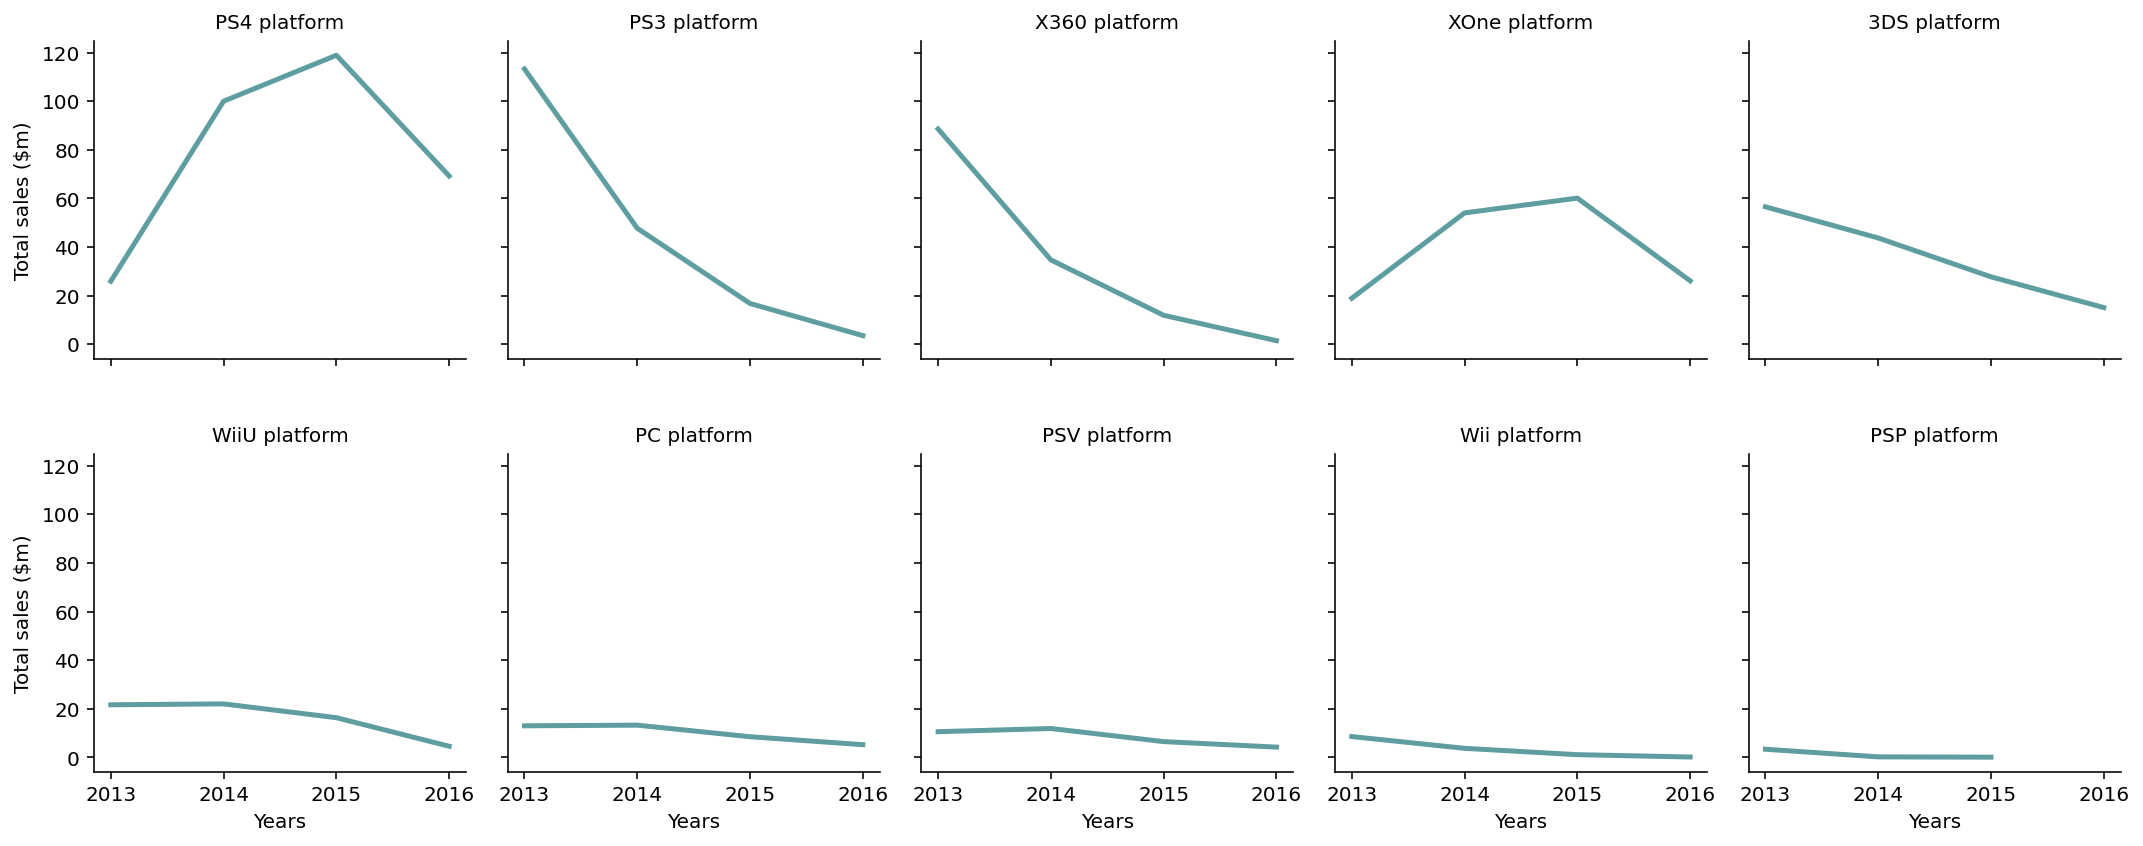

In [20]:
# calculate total_sales by year and platform 
newplatforms_by_sales = pd.pivot_table(new_games, index = ['year_of_release','platform'], \
                                        values = 'total_sales', aggfunc = 'sum').reset_index(). \
                                        sort_values(by = 'total_sales', ascending = False)

g = sns.relplot(kind = 'line', data = newplatforms_by_sales, x = 'year_of_release', y = 'total_sales', \
                col='platform', col_wrap = 5, height = 3, linewidth = 2.5, color = 'cadetblue')
g.set_axis_labels('Years', 'Total sales ($m)')
g.set_titles(col_template = '{col_name} platform');
plt.subplots_adjust(hspace = 0.3)

bestplatforms.head(6).style.hide_index().hide_columns('Year of release'). \
                format(precision = 2, formatter = {'Total sales ($m)': "{:.2f}",})

The most profitable platforms in 2016 were PS4, XOne, 3DS, PC, WiiU, PSV – all from the eighth generation. So we should consider them to be potentially profitable. (And of course, Nintendo Switch that would be released in 2017).
PS3, X360, Wii, PSP were profitable in the past but now are too old to have significant sales.

---
**Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.**

Platform,Mean sales ($m),Median sales ($m),std ($m)
PS4,0.80,0.20,1.61
XOne,0.65,0.22,1.04
WiiU,0.56,0.20,1.04
3DS,0.47,0.09,1.38
PC,0.21,0.08,0.35
PSV,0.09,0.04,0.15


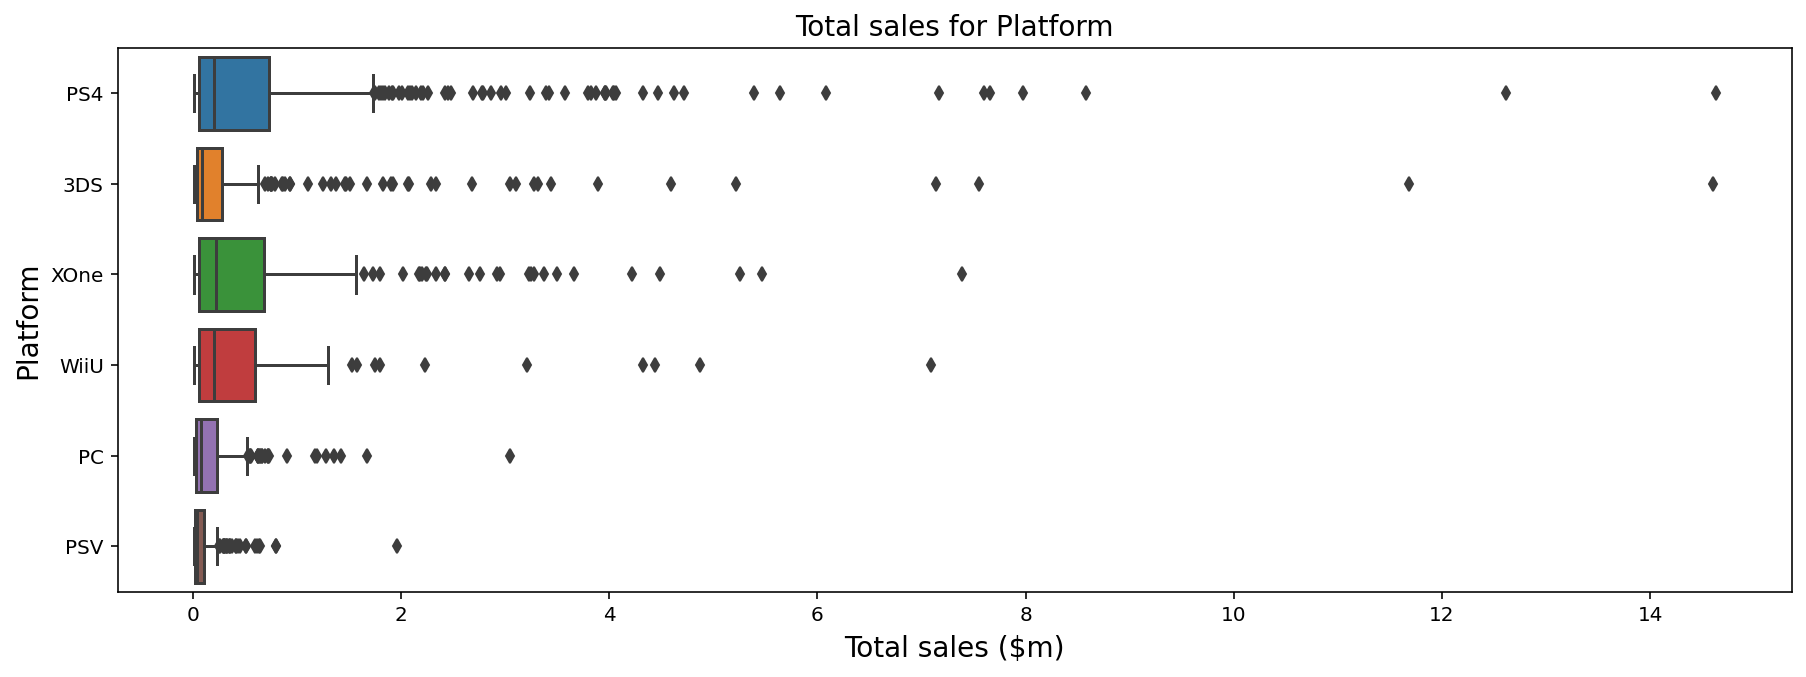

In [21]:
# for these potentially profitable platforms let's calculate the distribution of total_sales
newest_games = new_games[new_games['platform'].isin(['PS4', 'XOne', '3DS', 'PC', 'WiiU', 'PSV'])]

by_platform = newest_games[['platform','name','total_sales']]

fig, ax = plt.subplots(figsize = (15, 5))
sns.boxplot(data = by_platform, y = 'platform', x = 'total_sales', ax = ax)
ax.set_title('Total sales for Platform', fontsize = 14)
ax.set_xlabel('Total sales ($m)', labelpad = 5, fontsize = 14)
ax.set_ylabel('Platform', fontsize = 14);

combined = by_platform.groupby('platform').agg({'total_sales': ['mean', 'median', 'std']}).reset_index()
combined.columns = ['Platform', 'Mean sales ($m)', 'Median sales ($m)', 'std ($m)']
combined = combined.sort_values('Mean sales ($m)', ascending = False)
combined.style.hide_index().format(precision = 2, \
                        formatter={'Mean sales ($m)': "{:.2f}", 'Median sales ($m)': "{:.2f}", 'std ($m)': "{:.2f}"})

Total sales of the games are very widely distributed, and it is true across all the platforms. While all the median sales are less than 1m, every platform has titles that bring profit many times greater. The average sales for home consoles (PS4, XOne, WiiU) are ~0.20m with std of 1-1.6m (largest for PS4). The average sales for handheld consoles and PC are significantly smaller: for 3DS it's 0.12m (std 1.43m), for PC 0.08 m (std 0.53m), and for PSV 0.05m (std 0.21m)

---
**Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.**

In [22]:
# let's find the platform with largest number of critics' and users' scores 
# (we could measure only one value, since we "copied" the missing ones)
score_by_platform = pd.pivot_table(new_games, index = ['platform'], values = ['critic_score'], \
                                   aggfunc = 'count').reset_index()

score_by_platform.columns = ['Platform', 'Critic score']
score_by_platform.sort_values('Critic score', ascending = False).head(3).style.hide_index()

Platform,Critic score
PS4,292
PS3,220
XOne,207


Let's use PlayStation4 since it is the platform with the most number of Critics' scores.

Correlation of Total sales to Critic score is: 0.30
Correlation of Total sales to User score is: 0.02


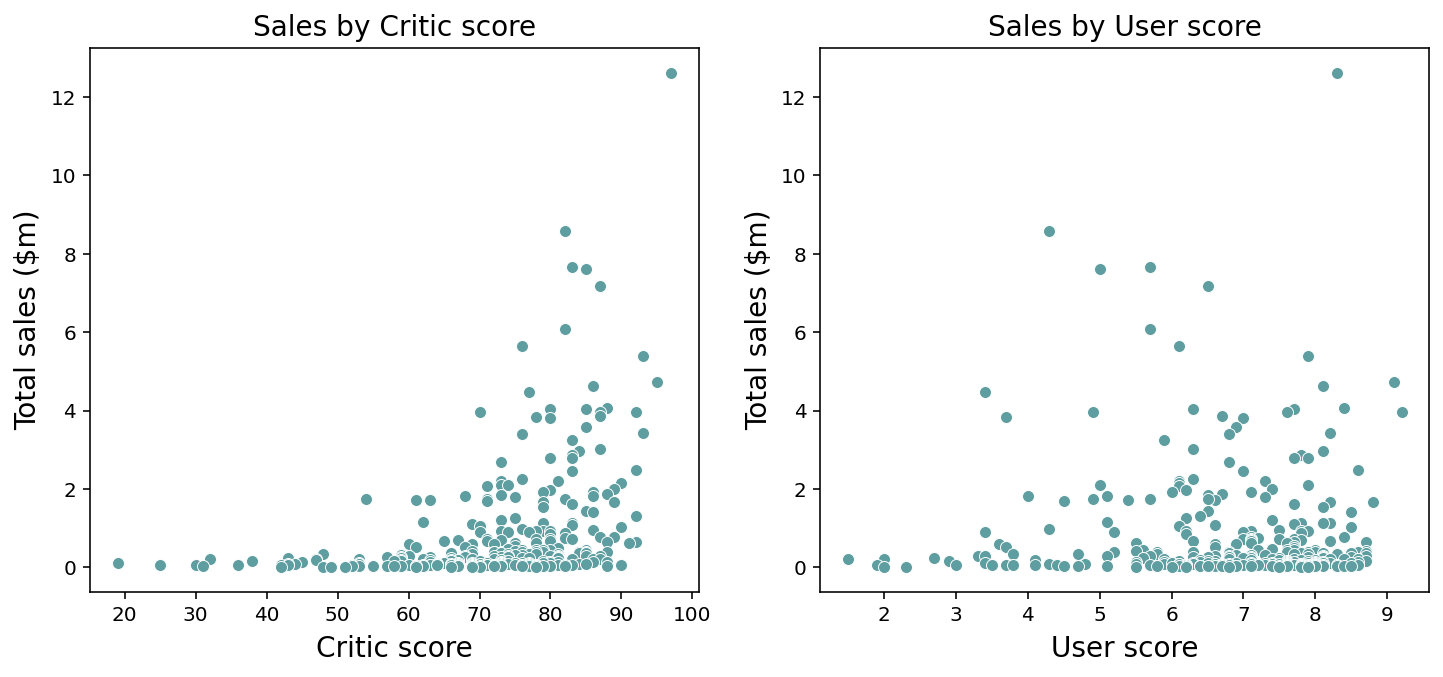

In [23]:
def draw_scores(dfs: pd.core.frame.DataFrame, col_names: list):
    fig, ax = plt.subplots(1, 2, figsize = (12, 5))
    for i, column in enumerate(col_names):  
        sns.scatterplot(data = dfs, x = column, y = 'total_sales', color = 'cadetblue', ax = ax[i])
        beautify_column = column[0].upper() + column[1:].replace('_', ' ')
        ax[i].set_title(f'Sales by {beautify_column}', fontsize = 14)
        ax[i].set_xlabel(beautify_column, labelpad = 5, fontsize = 14)
        ax[i].set_ylabel('Total sales ($m)', fontsize = 14);

ps3 = new_games[new_games['platform'] == 'PS4']
draw_scores(ps3, ['critic_score', 'user_score'])             
            
print('Correlation of Total sales to Critic score is: {0:.2f}'. \
      format(new_games['total_sales'].corr(new_games['critic_score'])))
print('Correlation of Total sales to User score is: {0:.2f}'. \
      format(new_games['total_sales'].corr(new_games['user_score'])))

There is no apparent correlation between Users' or Critics' scores and Total sales of the Game.

---
**Keeping your conclusions in mind, compare the sales of the same games on other platforms.**

In [24]:
# let's find the games with largest number of platforms and sales
game_by_platform = pd.pivot_table(new_games, index = ['name'], values = ['platform', 'total_sales'], \
                                  aggfunc = {'platform': 'count', 'total_sales': 'sum'}).reset_index()

game_by_platform.columns = ['Name', 'Number of platforms', 'Total sales ($m)']
html_str = ''

s = game_by_platform.sort_values('Number of platforms', ascending = False).head(3).style.hide_index()
s = s.format(precision = 2, formatter = {'Total sales ($m)': "{:.2f}"}).render()
html_str += '<td style="text-align:left; padding-right:20px">Games existing on most number of platforms<br /><br />'
html_str += s.replace('table','table style="display:inline; margin:10px"')
html_str += '</td>'

s = game_by_platform.sort_values('Total sales ($m)', ascending = False).head(3).style.hide_index()
s = s.format(precision = 2, formatter = {'Total sales ($m)': "{:.2f}"}).render()
html_str += '<td style="text-align:left;">Games with largest sales (platforms combined)<br /><br />'
html_str += s.replace('table','table style="display:inline"')
html_str += '</td>'

display_html(html_str, raw = True) 

Name,Number of platforms,Total sales ($m)
FIFA 14,9,16.46
LEGO Jurassic World,8,4.69
FIFA 15,8,17.37
Name,Number of platforms,Total sales ($m)
Grand Theft Auto V,5,56.58
Call of Duty: Ghosts,6,27.39
Call of Duty: Black Ops 3,5,25.67


For this comparison, I decided to choose a game released on the most platforms and a game with the largest cumulative total_sales (across all platforms).

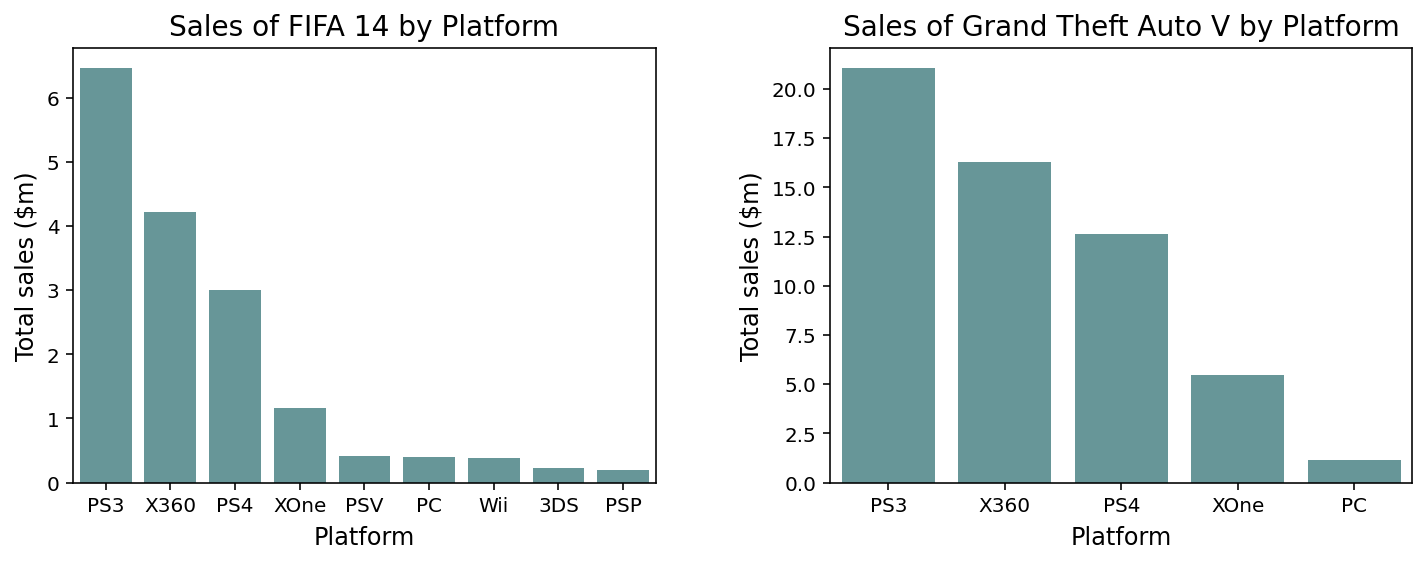

In [25]:
def draw_bars(dfs: dict):
    fig, ax = plt.subplots(1, 2, figsize = (12, 4))
    plt.subplots_adjust(wspace = 0.3);
    i = 0
    for name, data in dfs.items():  
        sns.barplot(data = data, x = 'platform', y = 'total_sales', color = 'cadetblue', ax = ax[i])
        ax[i].set_title(f'Sales of {name} by Platform', fontsize = 14)
        ax[i].set_xlabel('Platform', labelpad = 5, fontsize = 12)
        ax[i].set_ylabel('Total sales ($m)', fontsize = 12);
        i = 1

draw_bars({'FIFA 14': new_games[new_games['name'] == 'FIFA 14'], \
           'Grand Theft Auto V': new_games[new_games['name'] == 'Grand Theft Auto V']}) 

For both these games, most of the sales are from PS3 or X360.

----
**Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?**

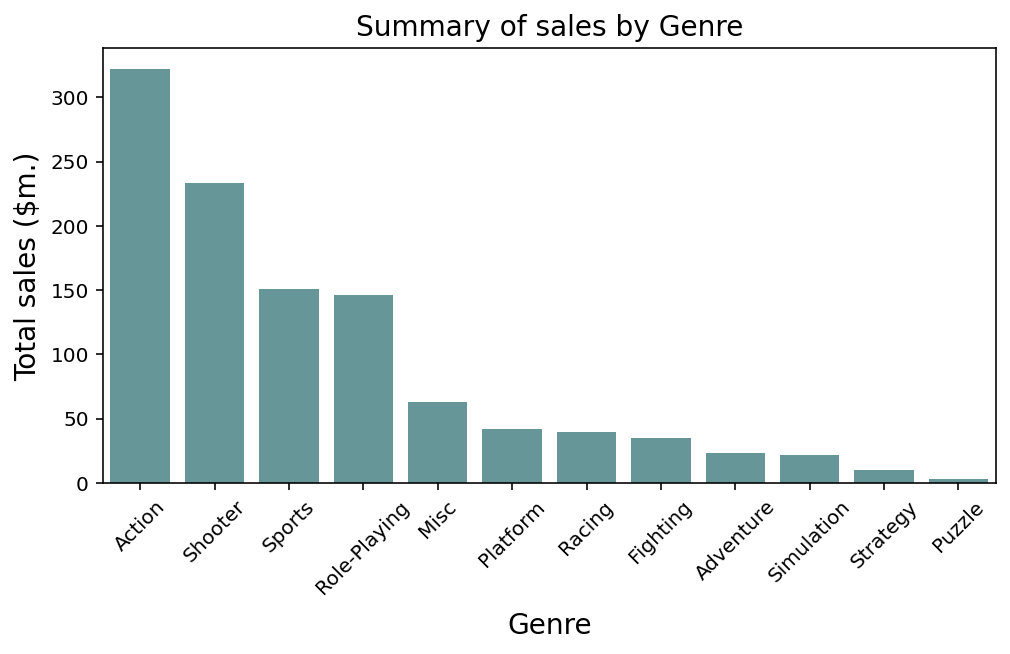

In [26]:
games_by_genre = new_games[['genre', 'total_sales']].groupby(['genre']).sum(). \
                sort_values(by = 'total_sales', ascending=False).reset_index()

fig, ax = plt.subplots(figsize = (8, 4))
sns.barplot(data = games_by_genre, x = 'genre', y = 'total_sales', color = 'cadetblue', ax = ax)
plt.xticks(rotation = 45);
ax.set_title('Summary of sales by Genre', fontsize = 14)
ax.set_xlabel('Genre', labelpad = 7, fontsize = 14)
ax.set_ylabel('Total sales ($m.)', fontsize = 14);

The most sales are in Action, Shooter, Sports and Role-Playing Genres. The least in Strategy and Puzzle.

### Conclusion

Wanting to identify patterns that determine whether a game succeeds or not, we first need to decide if all our data is valid.

Looking at the distribution of games' quantity by years of release, we see that until 2002 there were significantly fewer games.   
Also, if we look at how the total sales for the most profitable platforms are distributed by years of release, we can see that almost every platform has a limited lifespan. Except for the PC and some handheld consoles, the average lifespan for the platform is 10-15 years.  
To decide what part of the data I should discard, I looked at the platforms having notable sales in 2016. The latest year of their release was 2013, so I chose this year as a threshold for our dataset.
Therefore, to build our prognosis for 2017, we could leave only the data starting from 2013, mainly including the seventh and eighth generations of platforms.   
This part of the data is about 13.4% of the original dataset.

With this smaller data, we can decide which platforms were still leading in sales in 2016 and which are already past their best time.   
Last year, the most profitable platforms were PS4, XOne, 3DS, PC, WiiU, PSV – all from the eighth generation. So we should consider them to be potentially beneficial. On the other hand, PS3, X360, Wii, PSP were profitable but now are too old to have significant sales.

Total sales of the games are very widely distributed, and it is true across all the platforms. While all the median sales are less than 1m, every platform has titles that bring profit many times greater. The average sales for home consoles (PS4, XOne, WiiU) are ~0.20m with std of 1-1.6m (largest for PS4). The average sales for handheld consoles and PC are significantly smaller: for 3DS it's 0.12m (std 1.43m), for PC 0.08m (std 0.53m), and for PSV 0.05m (std 0.21m)

Taking one platform with the most significant number of scores (PlayStation4), I tried to find how Critics' and Users' scores influence game sales. And there is no apparent correlation between scores and sales.

Also, I took a game released on the most number of platforms and one with the largest sales combined and plotted their sales across the platforms. It shows that the most profitable platforms were PS3 and X360.

And lastly, I plotted the distribution of sales by genre. Action, Shooter, Sports, and Role-Playing are the most profitable, while Strategy and Puzzle are the least.

## Create a user profile for each region

**By Platform**

Platform,North America sales share
PS4,24.86%
XOne,21.29%
X360,18.67%
PS3,14.52%
3DS,8.73%
others,11.92%
Platform,European Union sales share
PS4,36.00%
PS3,17.30%
XOne,13.16%


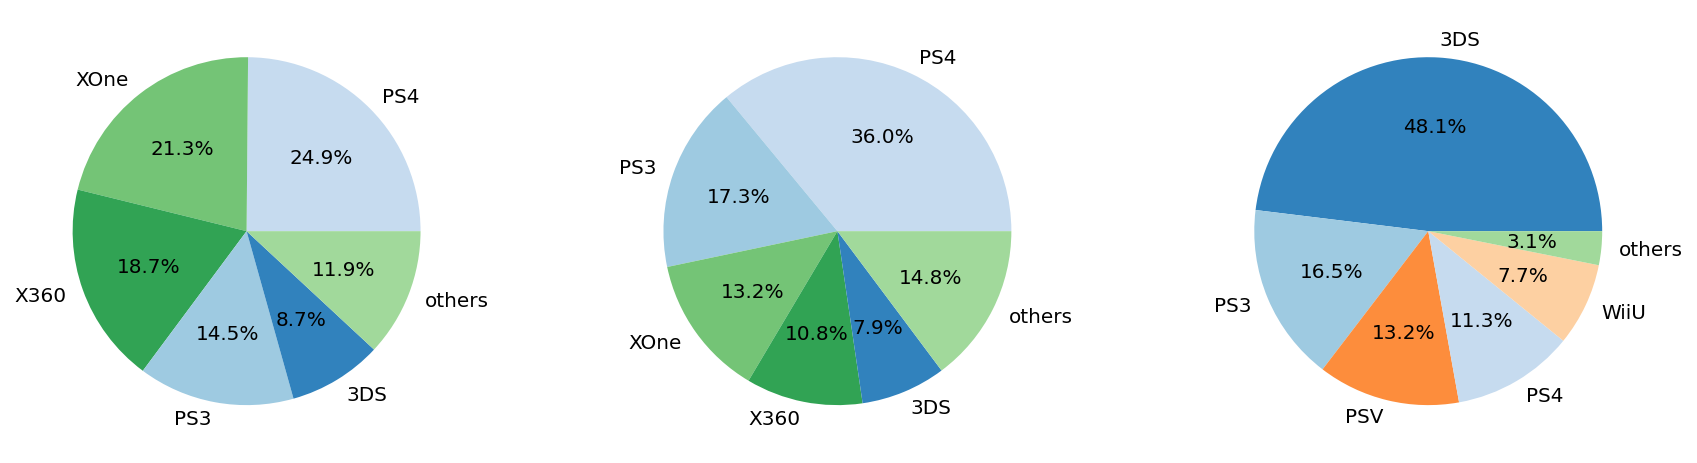

In [27]:
def show_share(df: pd.core.frame.DataFrame, regions: dict, title):
    html_str = ''
    colours = dict(zip(df[title], plt.cm.tab20c.colors[:len(df[title])]))
    colours['others'] = plt.cm.tab20c.colors[len(df[title])]
    fig, axes = plt.subplots(1, 3, figsize = (15, 4))
    i = 0
    for rname, region in regions.items():
        df[region] = df[region] / df[region].sum()
        df = df.sort_values(region, ascending = False)
        largest = df[:5].copy()
        if df[region][5:].sum() != 0 :
            new_row = pd.DataFrame(data = {title: ['others'], region: [df[region][5:].sum()]})
            largest = pd.concat([largest, new_row])        
        
        axes[i].pie(largest[region], labels = largest[title], autopct='%1.1f%%', \
                    colors = [colours[key] for key in largest[title]])
        i+=1

        s = largest.style.hide_columns([v for v in regions.values() if v != region]).hide_index()
        s = s.format(precision = 2, formatter = {region: "{:.2%}"}).render()
        html_str+='<td style="text-align:left; padding-right:20px">'
        html_str+=f'{title}s with largest sales in {rname}<br /><br />'
        html_str+=s.replace('table','table style="display:inline"')
        html_str+='</td>'
    display_html(html_str,raw=True) 

regions = {'North America': 'North America sales share', 'European Union': 'European Union sales share', 
           'Japan': 'Japan sales share'}
                
game_by_platform = pd.pivot_table(new_games, index = ['platform'], values = ['na_sales', 'eu_sales', 'jp_sales'], 
                                  aggfunc = 'sum').reset_index()
game_by_platform.columns = ['Platform', 'European Union sales share', 'Japan sales share', 'North America sales share']
show_share(game_by_platform, regions, 'Platform')

---
**By Genre**

Genre,North America sales share
Action,28.79%
Shooter,25.09%
Sports,14.92%
Role-Playing,10.63%
Misc,6.28%
others,14.28%
Genre,European Union sales share
Action,30.20%
Shooter,22.42%
Sports,15.43%


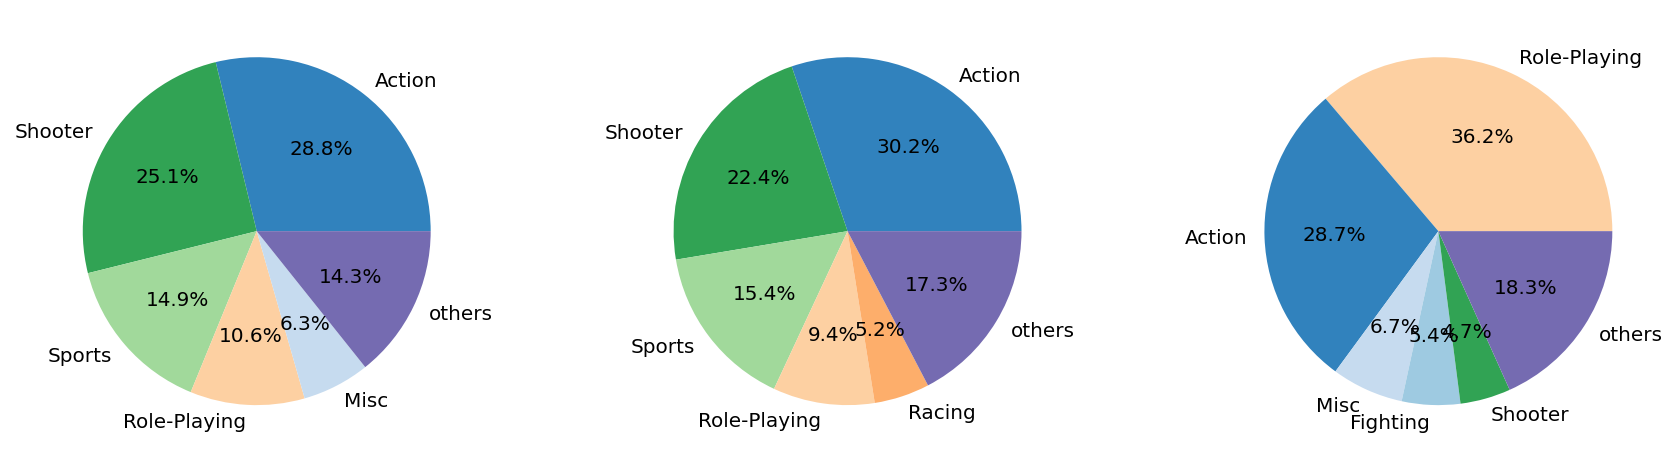

In [28]:
game_by_genre = pd.pivot_table(new_games, index = ['genre'], values = ['na_sales', 'eu_sales', 'jp_sales'], 
                                  aggfunc = 'sum').reset_index()
game_by_genre.columns = ['Genre', 'European Union sales share', 'Japan sales share', 'North America sales share']
show_share(game_by_genre, regions, 'Genre')

---
**By Rating**

Rating,North America sales share
M,46.60%
E,19.60%
T,19.56%
E10+,14.24%
Rating,European Union sales share
M,46.25%
E,23.44%
T,17.31%
E10+,13.00%
Rating,Japan sales share


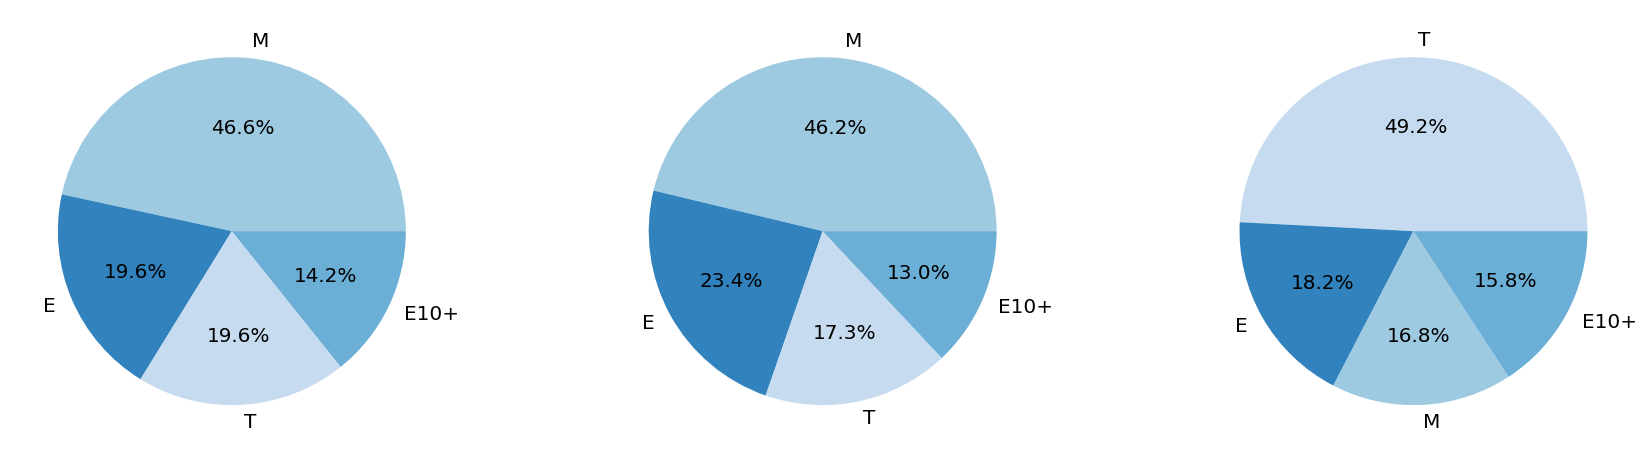

In [29]:
game_by_rating = pd.pivot_table(new_games, index = ['rating'], values = ['na_sales', 'eu_sales', 'jp_sales'], 
                                  aggfunc = 'sum').reset_index()
game_by_rating.columns = ['Rating', 'European Union sales share', 'Japan sales share', 'North America sales share']
show_share(game_by_rating, regions, 'Rating')

### Conclusion

Looking for different metrics by region, we can see that North America's and European users are close to each other and Japan market is very different.

**By platform**  
In North America and the European Union, the most significant shares are for PlayStation and Xbox, while Nintendo 3DS and PlayStation are leading in Japan.

**By genre**  
In North America and the European Union, the most significant shares are in the Action, Shooter and Sports genres, while in Japan, in the Role-Playing and Action.

**By Rating**  
In North America and the European Union, the most considerable proportion of games is in the M Rating, while in Japan in T.

## Test the hypotheses

We would like to know if the average user scores of the Xbox One and PC platforms are the same.  

**Null hypothesis:** There are no statistically significant differences between the means of user ratings from the Xbox One and PC platforms.  
**Alternative hypothesis** There is a statistically significant difference between the means of user ratings from the Xbox One and PC platforms.

95% statistical significance level (alpha 0.05) would be enough for our task.

In [30]:
user_xone = new_games[new_games['platform'] == 'XOne']['user_score'].dropna()
user_pc = new_games[new_games['platform'] == 'PC']['user_score'].dropna()
print('Average user score for Xbox One {0:.2f}, for PC {1:.2f}'.format(user_xone.mean(), user_pc.mean()))
print()
alpha = 0.05

# The small p-value suggests that the populations do not have equal variances.
stat, p  = st.levene(user_xone, user_pc) 
equal_var = False if p < 0.05 else True
results = st.ttest_ind(user_xone, user_pc, equal_var = equal_var)
# H₀ the average user rating is equal
if results.pvalue < alpha:
    print("Reject the null hypothesis.") # They are equal
else:
    print("Can't reject the null hypothesis.") # Can't reject they are equal

Average user score for Xbox One 6.55, for PC 6.23

Can't reject the null hypothesis.


### Conclusion

I could not reject the null hypothesis that there are no statistically significant differences between the means of user ratings from the Xbox One and PC platforms. These ratings belong to the same statistical population.

-----
We would like to know if the average user scores for the Action and Sports genres are different.

**Null hypothesis:** There are no statistically significant differences between the means of user ratings for the Action and Sports genres.  
**Alternative hypothesis** There is a statistically significant difference between the means of user ratings for the Action and Sports genres.

95% statistical significance level (alpha 0.05) would be enough for our task.

In [31]:
user_action = new_games[new_games['genre'] == 'Action']['user_score'].dropna()
user_sports = new_games[new_games['genre'] == 'Sports']['user_score'].dropna()
print('Average user score for Action {0:.2f}, for Sports {1:.2f}'.format(user_action.mean(), user_sports.mean()))
print()

alpha = 0.05

# The small p-value suggests that the populations do not have equal variances.
stat, p  = st.levene(user_action, user_sports) 
equal_var = False if p < 0.05 else True
results = st.ttest_ind(user_action, user_sports, equal_var = equal_var)

# H₀ the average user rating is equal
if results.pvalue < alpha:
    print("Reject the null hypothesis.") # They are equal
else:
    print("Can't reject the null hypothesis.") # Can't reject they are equal

Average user score for Action 6.78, for Sports 5.15

Reject the null hypothesis.


### Conclusion

I rejected the null hypothesis that there are no statistically significant differences between the means of user ratings for the Action and Sports genres. The average user score for the Action genre is statistically significantly higher than for the Sports.

## Overall conclusion

Here we have a small dataset on video games. After some preprocessing that consisted of renaming columns, cleaning the Names and User_score columns, and changing data types, I filled in some missing values in Year_of_release, Critic_score, User_score, and Rating. But still, there were 43.55% of Users' and Critics' scores that I could not fill in any meaningful way. Also, I calculate each game's total sales across all regions.

For the first step of the analysis, I looked at the game number and total_sales for the platforms across time. We could see that consoles have a limited lifespan, so we should consider only the eighth generation of consoles (PS4, XOne, 3DS, PC, WiiU, and PSV) and PC to be potentially profitable. And, of course, do not forget about the Nintendo Switch that will be released in 2017.

We don't see any apparent correlation between Users' or Critics' scores and game sales.

The most profitable genres are Action, Shooter, Sports, and Role-Playing.

Comparing different regions, we could see that North America and European Union users behave similarly, while Japan market is different in most profitable platforms, genres and ratings.

And finally, I tested two hypotheses and found that average user scores for Xbox One and PC are equal. At the same time, there is a statistically significant difference in average user scores for the Action and Sports genres. 